In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gym_microrts import microrts_ai
from gym_microrts.envs.vec_env import MicroRTSGridModeVecEnv

In [2]:
map_size = 4
envs = MicroRTSGridModeVecEnv(
    num_selfplay_envs=0,
    num_bot_envs=1,
    max_steps=2000,
    render_theme=2,
    ai2s=[microrts_ai.coacAI for _ in range(1)],
    #ai2s=[microrts_ai.vulcanMCTSAI for _ in range(1)],
    map_paths=["maps/4x4/base4x4.xml"],
    reward_weight=np.array([10.0, 1.0, 1.0, 0.2, 1.0, 4.0]),
)
_ = envs.reset()

#### For i in range 1000

In [3]:
action_mask = envs.get_action_mask()
action_mask = action_mask.reshape(-1, action_mask.shape[-1])
action_mask.shape

(16, 78)

In [4]:
action_mask_tiles = action_mask.reshape(map_size, map_size, -1)
action_mask_tiles.shape

(4, 4, 78)

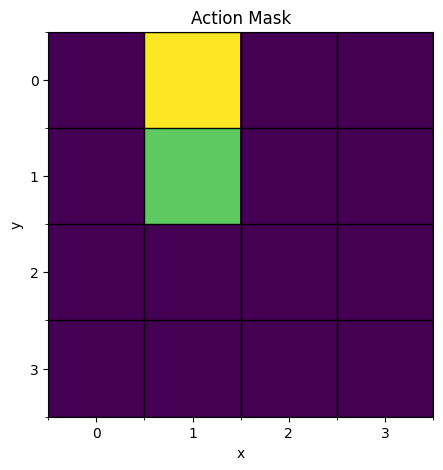

In [5]:
plt.figure(figsize=(5, 5))
plt.imshow(action_mask_tiles.sum(-1))

plt.gca().set_xticks(np.arange(-.5, map_size, 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, map_size, 1), minor=True)
plt.grid(which="minor", axis="both", linestyle="-", color="k", linewidth=1)

plt.xticks(np.arange(0, map_size, 1))
plt.yticks(np.arange(0, map_size, 1))
plt.xlabel("x")
plt.ylabel("y")

plt.title("Action Mask")
plt.show()

In [6]:
def print_action_space(action_mask_tile):
    # (action_mask[0:6]),  # action type: {NOOP, move, harvest, return, produce, attack}
    # (action_mask[6:10]),  # move parameter: {north, east, south, west}
    # (action_mask[10:14]),  # harvest parameter: {north, east, south, west}
    # (action_mask[14:18]),  # return parameter: {north, east, south, west}
    # (action_mask[18:22]),  # produce_direction parameter: {north, east, south, west}
    # (action_mask[22:29]),  # produce_unit_type parameter: {resource, base, barracks, worker, light, heavy, ranged}
    # (action_mask[29 : sum(envs.action_space.nvec[1:])]),  # attack_target parameter: relative position of the unit that will be attacked

    # visualization of the action space for a given tile, translating where 1 means that the corresponding action is available
    
    action_types = ["NOOP", "move", "harvest", "return", "produce", "attack"]

    print("Action Type:")
    mask = action_mask_tile[0:6]
    print_masked(mask, mask)
    print_masked(mask, action_types)
    print()

    location_parameters = ["north", "east", "south", "west"]

    print("Move Parameter:")
    mask = action_mask_tile[6:10]
    print_masked(mask, mask)
    print_masked(mask, location_parameters)
    print()

    print("Harvest Parameter:")
    mask = action_mask_tile[10:14]
    print_masked(mask, mask)
    print_masked(mask, location_parameters)
    print()

    print("Return Parameter:")
    mask = action_mask_tile[14:18]
    print_masked(mask, mask)
    print_masked(mask, location_parameters)
    print()

    print("Produce Direction Parameter:")
    mask = action_mask_tile[18:22]
    print_masked(mask, mask)
    print_masked(mask, location_parameters)
    print()

    unit_types = ["resource", "base", "barracks", "worker", "light", "heavy", "ranged"]

    print("Produce Unit Type Parameter:")
    mask = action_mask_tile[22:29]
    print_masked(mask, mask)
    print_masked(mask, unit_types)
    print()

    print("Attack Target Parameter:")
    mask = action_mask_tile[29:sum(envs.action_space.nvec[1:])]
    print(mask.reshape(7, 7))
    print()


def print_masked(mask, params):
    for i, param in enumerate(params):
        if mask[i] == 1:
            print(f"\033[1m{param: ^7}\033[0m", end=" ")
        else:
            print(f'{param: ^7}', end=" ")
    print()


print_action_space(action_mask_tiles[0][1])
    

Action Type:
   1       1       1       0       1       0    
 NOOP    move   harvest return  produce attack  

Move Parameter:
   0       1       0       0    
 north   east    south   west   

Harvest Parameter:
   0       0       0       1    
 north   east    south   west   

Return Parameter:
   0       0       0       0    
 north   east    south   west   

Produce Direction Parameter:
   0       1       0       0    
 north   east    south   west   

Produce Unit Type Parameter:
   0       0       1       0       0       0       0    
resource  base   barracks worker   light   heavy  ranged  

Attack Target Parameter:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]



In [7]:
rows_letters = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
action_types = ["NOOP", "move", "harvest", "return", "produce", "attack"]
location_parameters = ["north", "east", "south", "west"]
unit_types = ["resource", "base", "barracks", "worker", "light", "heavy", "ranged"]


def action_mask_to_string(action_mask_tiles, row, col):

    resulting_strings = []


    unit = f"{rows_letters[row]}{col}"

    # NOOP
    if action_mask_tiles[0] == 1:
        print(f"({unit}, NOOP)")
        resulting_strings.append(f"({unit}, NOOP)")

    # move
    if action_mask_tiles[1] == 1:
        for i, param in zip(action_mask_tiles[6:10], location_parameters):
            if i == 1:
                print(f"({unit}, move, {param})")
                resulting_strings.append(f"({unit}, move, {param})")

    # harvest
    if action_mask_tiles[2] == 1:
        for i, param in zip(action_mask_tiles[10:14], location_parameters):
            if i == 1:
                print(f"({unit}, harvest, {param})")
                resulting_strings.append(f"({unit}, harvest, {param})")

    # return
    if action_mask_tiles[3] == 1:
        for i, param in zip(action_mask_tiles[14:18], location_parameters):
            if i == 1:
                print(f"({unit}, return, {param})")
                resulting_strings.append(f"({unit}, return, {param})")

    # produce
    if action_mask_tiles[4] == 1:
        for i, param in zip(action_mask_tiles[18:22], location_parameters):
            if i == 1:
                for j, param2 in zip(action_mask_tiles[22:29], unit_types):
                    if j == 1:
                        print(f"({unit}, produce, {param}, {param2})")
                        resulting_strings.append(f"({unit}, produce, {param}, {param2})")

In [8]:
def string_to_action(response):
    actions = np.zeros((map_size, map_size, 7))

    for key, value in response.items():
        s_action = value.strip("()").split(", ")
        print(s_action)

        unit = s_action[0]
        actiontype_choice = s_action[1]
        actiontype_param = action_types.index(actiontype_choice)

        location_choice = s_action[2]
        location_param = location_parameters.index(location_choice)

        if len(s_action) > 3:
            unit_type_choice = s_action[3] 
            unit_types_param = unit_types.index(unit_type_choice)
        else:
            unit_types_param = 0

        row = rows_letters.index(unit[0])
        col = int(unit[1])

        action = [
            actiontype_param,
            location_param,
            location_param,
            location_param,
            location_param,
            unit_types_param,
            0  # attack_target parameter TBD
        ]

        actions[row][col] = action
        

    return actions

response = {
0: "(A2, move, east)",
1: "(A2, produce, south, barracks)"
}
act = string_to_action(response)
act

['A2', 'move', 'east']
['A2', 'produce', 'south', 'barracks']


array([[[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [4., 2., 2., 2., 2., 2., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]]])

In [9]:
for row in range(map_size):
    for col in range(map_size):
        action_mask_tile = action_mask_tiles[row][col]
        action_mask_to_string(action_mask_tile, row, col)

(A1, NOOP)
(A1, move, east)
(A1, harvest, west)
(A1, produce, east, barracks)
(B1, NOOP)
(B1, produce, east, worker)
(B1, produce, south, worker)
(B1, produce, west, worker)


In [10]:
[
    [1, 0, 0, 0, 0, 0],  # action type: {NOOP, move, harvest, return, produce, attack}
    [0, 0, 0, 0],  # move parameter: {north, east, south, west}
    [0, 0, 0, 0],  # harvest parameter: {north, east, south, west}
    [0, 0, 0, 0],  # return parameter: {north, east, south, west}
    [0, 0, 0, 0],  # produce_direction parameter: {north, east, south, west}
    [0, 0, 0, 0, 0, 0, 0],  # produce_unit_type parameter: {resource, base, barracks, worker, light, heavy, ranged}
    np.zeros(sum(envs.action_space.nvec[1:]))  # attack_target parameter: relative position of the unit that will be attacked
]

[[1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 array([0., 0., 0., ..., 0., 0., 0.])]

In [11]:
ac_move_east = np.array([
    1,  # action type: {NOOP, move, harvest, return, produce, attack}
    1,  # move parameter: {north, east, south, west}
    0,  # harvest parameter: {north, east, south, west}
    0,  # return parameter: {north, east, south, west}
    0,  # produce_direction parameter: {north, east, south, west}
    0,  # produce_unit_type parameter: {resource, base, barracks, worker, light, heavy, ranged}
    0  # attack_target parameter: relative position of the unit that will be attacked
])
ac_produce_worker_south = np.array([4, 0, 0, 0, 2, 3, 0])
ac_produce_worker_west = np.array([4, 0, 0, 0, 3, 3, 0])

In [12]:
action = np.zeros((map_size, map_size, 7))
action.shape

(4, 4, 7)

In [13]:
action[0][1] = ac_move_east
action[1][1] = ac_produce_worker_west

In [14]:
action[0][1]

array([1., 1., 0., 0., 0., 0., 0.])

In [15]:
act[0][1]

array([0., 0., 0., 0., 0., 0., 0.])

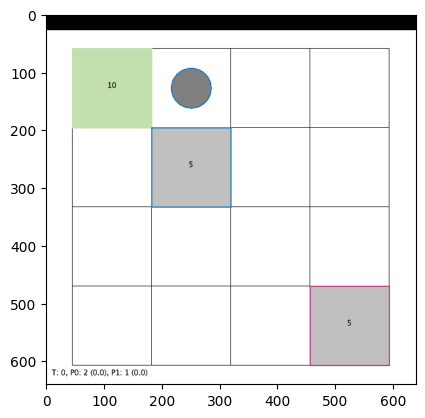

In [16]:
_ = envs.reset()
img = envs.render(mode='rgb_array')
plt.imshow(img)

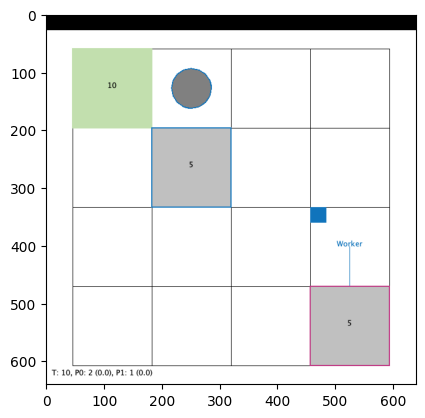

In [17]:
for i in range(10):
    response = envs.step(
        act
    )

    img = envs.render(mode='rgb_array')
    plt.imshow(img)

    if response[2][0]:
        print("done")
        break

In [18]:
observation = response[0]

In [19]:
observation[0].shape

(4, 4, 27)

In [20]:
features = observation[0][0][0]

In [21]:
owners = ["NEUTRAL", "PLAYER", "ENEMY"]
obs_unit_types = ["NO_UNIT"] + unit_types


def extract_observation_features(features):
    feat_hit_points = features[0:5]
    hit_points = np.argmax(feat_hit_points)

    feat_resources = features[5:10]
    resources = np.argmax(feat_resources)
    resources = None if resources == 0 else f"resources: {resources}"

    feat_owner = features[10:13]
    owner = np.argmax(feat_owner)
    str_owner = owners[owner]

    feat_unit_types = features[13:21]
    unit_type = np.argmax(feat_unit_types)
    str_unit_type = obs_unit_types[unit_type]

    feat_action_type = features[21:27]
    action_type = np.argmax(feat_action_type)
    str_action_type = action_types[action_type]

    obs_str = (
        str_unit_type, 
        f"hp:{hit_points}", 
        resources, 
        str_owner, 
        str_action_type
    )

    return obs_str

In [22]:
observation[0].shape

(4, 4, 27)

In [23]:

positions = np.array([
    [
        [f"{rows_letters[j]}{i}"] for j in range(map_size)
    ] for i in range(map_size)
])
positions

array([[['A0'],
        ['B0'],
        ['C0'],
        ['D0']],

       [['A1'],
        ['B1'],
        ['C1'],
        ['D1']],

       [['A2'],
        ['B2'],
        ['C2'],
        ['D2']],

       [['A3'],
        ['B3'],
        ['C3'],
        ['D3']]], dtype='<U2')

In [24]:
decoded_observation = np.apply_along_axis(extract_observation_features, 2, observation[0])
decoded_observation = np.concatenate(
    (
        positions,
        decoded_observation,
    ),
    axis=-1
)

In [25]:
decoded_observation



array([[['A0', 'resource', 'hp:1', 'resources: 4', 'NEUTRAL', 'NOOP'],
        ['B0', 'worker', 'hp:1', 'None', 'PLAYER', 'NOOP'],
        ['C0', 'NO_UNIT', 'hp:0', 'None', 'NEUTRAL', 'NOOP'],
        ['D0', 'NO_UNIT', 'hp:0', 'None', 'NEUTRAL', 'NOOP']],

       [['A1', 'NO_UNIT', 'hp:0', 'None', 'NEUTRAL', 'NOOP'],
        ['B1', 'base', 'hp:4', 'None', 'PLAYER', 'NOOP'],
        ['C1', 'NO_UNIT', 'hp:0', 'None', 'NEUTRAL', 'NOOP'],
        ['D1', 'NO_UNIT', 'hp:0', 'None', 'NEUTRAL', 'NOOP']],

       [['A2', 'NO_UNIT', 'hp:0', 'None', 'NEUTRAL', 'NOOP'],
        ['B2', 'NO_UNIT', 'hp:0', 'None', 'NEUTRAL', 'NOOP'],
        ['C2', 'NO_UNIT', 'hp:0', 'None', 'NEUTRAL', 'NOOP'],
        ['D2', 'NO_UNIT', 'hp:0', 'None', 'NEUTRAL', 'NOOP']],

       [['A3', 'NO_UNIT', 'hp:0', 'None', 'NEUTRAL', 'NOOP'],
        ['B3', 'NO_UNIT', 'hp:0', 'None', 'NEUTRAL', 'NOOP'],
        ['C3', 'NO_UNIT', 'hp:0', 'None', 'NEUTRAL', 'NOOP'],
        ['D3', 'base', 'hp:4', 'None', 'ENEMY', 'produce']]],

In [26]:
# filter out the NO_UNIT observations
obs_with_units = decoded_observation[decoded_observation[:, :, 1] != 'NO_UNIT']

In [27]:
obs_with_units

array([['A0', 'resource', 'hp:1', 'resources: 4', 'NEUTRAL', 'NOOP'],
       ['B0', 'worker', 'hp:1', 'None', 'PLAYER', 'NOOP'],
       ['B1', 'base', 'hp:4', 'None', 'PLAYER', 'NOOP'],
       ['D3', 'base', 'hp:4', 'None', 'ENEMY', 'produce']], dtype='<U12')

In [28]:
prompt_str = np.apply_along_axis(lambda x: "("+", ".join(x)+")", 1, obs_with_units)
prompt_str = "\n".join(prompt_str)

In [29]:
print(prompt_str)

(A0, resource, hp:1, resources: 4, NEUTRAL, NOOP)
(B0, worker, hp:1, None, PLAYER, NOOP)
(B1, base, hp:4, None, PLAYER, NOOP)
(D3, base, hp:4, None, ENEMY, produce)


# LLAMA

In [37]:
import ollama
response = ollama.chat(model='mistral', messages=[
  {
    'role': 'user',
    'content': '''
You are a professional MicroRTS player. You know all the dependencies between units, buildings, attack system and the rules of the game. The primary goal is to defeat the opponent by either destroying their bases or eliminating all their units.

You need to specify detailed execution plans

## RULES

Gridworld Board Description:

The game is played on a grid-based map, with a size of 4x4 grid.
Each cell represents a specific location. 
Rows are labeled A, B, C, and D, while columns are numbered 0, 1, 2, and 3.
Example: A0 represents the top-left cell, and D3 represents the bottom-right cell.

Game Elements:

(A) Resources:
- Mineral Resources: Used to create new units and buildings, can be harvested by workers. Once harvested, the worker needs to bring the mineral to a base.

(B) Buildings:
- Base: Accumulates resources and trains workers. Bases are buildings.
- Barrack: Creates new attack units. Barracks are buildings.

(C) Units:
- Worker: Can harvest minerals and construct buildings. Is able to move one tile at a timestep, can only harvest adjacent tiles, can only construct buildings in adjacent tiles.
- Light: Attack unit with low power but fast melee capabilities. Is able to move one tile at a timestep, can attack enemies in adjacent tiles.
- Heavy: Attack unit with high power but slow melee capabilities. Is able to move one tile at a timestep, can attack enemies in adjacent tiles.
- Ranged: Attack unit with long-range capabilities. Is able to move one tile at a timestep, can attack enemies that are within a 3 tile radius of the current position.

## OBSERVATION


Obervation:
(position, unit_type, hp, resources, owner, action_type)
{
(A0, resource, hp:1, resources: 4, NEUTRAL, NOOP)
(B0, worker, hp:1, None, PLAYER, NOOP)
(B1, base, hp:4, None, PLAYER, NOOP)
(D3, base, hp:4, None, ENEMY, produce)
}

Set of valid actions:
(position, action_type, direction, production_type)
{
(A2, NOOP)
(A2, move, east)
(A2, move, south)
(A2, move, west)
(A2, produce, east, barracks)
(A2, produce, south, barracks)
(A2, produce, west, barracks)
}


## ACTION

Based on the current observation of the game state, Units and Buildings from both sides, a brief step-by-step analysis can be done from our strategy.
You can only issue micro actions to the units, meaning that before a certain worker is able to harverst resources at A1, it needs first to be in an adjacent tile, for example A2 or B1. 
Also, you can only issue actions for the current timestep.
Each unit can execute only one action, which means that in the response dictionary, you can only include one action per unit.
You don't need to issue actions to all units, but you can. 
You must respect the set of valid actions.
Use your best judgement and strategy to select the actions. Provide the next set of micro immediate actions. 

You should only respond in the format as described below:

RESPONSE FORMAT:
(tile, action, direction, produce_unit_type::optional)

Where:

tile: rows A to D, columns 0 to 3.
action: {move, harvest, return, produce, attack}.
direction: {north, east, south, west}.
produce_unit_type: {resource, base, barracks, worker, light, heavy, ranged}. Optional argument, only necessary for action==produce.

---example output:
{
0: "(A1, move, east)",
1: "(B1, produce, east, worker)",
}
---
Your answer should be only the response dictionary, as shown in the example output.
    ''',
  },
])
print(response['message']['content'])

 Based on the current observation and the valid actions, here's our step-by-step analysis and the next set of micro immediate actions:

Since there is an enemy base producing new units, we need to prioritize scouting and defending our own base. We also want to expand as soon as possible by building a barracks.

1. Our worker at B0 should move towards the closest mineral patch (A1 or D1) since it's currently idle. Let's assume A1 has minerals for simplicity.
2. The worker at A1 should return to our base B1 with the harvested minerals as soon as it finishes harvesting.
3. Our idle base B1 should produce a new barracks in an adjacent tile (let's say east, so the action would be "produce, east, barracks").

Response format:
{
0: "(B0, move, A1)",
1: "(A1, NOOP)",
2: "(B1, produce, east, barracks)",
}


In [32]:
from ollama import Client
client = Client(host='http://localhost:11434')
response = client.chat(model='mistral', messages=[
  {
    'role': 'user',
    'content': 'Why is the sky blue?',
  },
])

In [35]:
client.chat(model='mistral', messages=[
  {
    'role': 'user',
    'content': '''
You are a professional MicroRTS player. You know all the dependencies between units, buildings, attack system and the rules of the game. The primary goal is to defeat the opponent by either destroying their bases or eliminating all their units.

You need to specify detailed execution plans

## RULES

Gridworld Board Description:

The game is played on a grid-based map, with a size of 4x4 grid.
Each cell represents a specific location. 
Rows are labeled A, B, C, and D, while columns are numbered 0, 1, 2, and 3.
Example: A0 represents the top-left cell, and D3 represents the bottom-right cell.

Game Elements:

(A) Resources:
- Mineral Resources: Used to create new units and buildings, can be harvested by workers. Once harvested, the worker needs to bring the mineral to a base.

(B) Buildings:
- Base: Accumulates resources and trains workers. Bases are buildings.
- Barrack: Creates new attack units. Barracks are buildings.

(C) Units:
- Worker: Can harvest minerals and construct buildings. Is able to move one tile at a timestep, can only harvest adjacent tiles, can only construct buildings in adjacent tiles.
- Light: Attack unit with low power but fast melee capabilities. Is able to move one tile at a timestep, can attack enemies in adjacent tiles.
- Heavy: Attack unit with high power but slow melee capabilities. Is able to move one tile at a timestep, can attack enemies in adjacent tiles.
- Ranged: Attack unit with long-range capabilities. Is able to move one tile at a timestep, can attack enemies that are within a 3 tile radius of the current position.

## OBSERVATION


Obervation:
(position, unit_type, hp, resources, owner, action_type)
{
(A0, resource, hp:1, resources: 4, NEUTRAL, NOOP)
(B0, worker, hp:1, None, PLAYER, NOOP)
(B1, base, hp:4, None, PLAYER, NOOP)
(D3, base, hp:4, None, ENEMY, produce)
}

Set of valid actions:
(position, action_type, direction, production_type)
{
(A2, NOOP)
(A2, move, east)
(A2, move, south)
(A2, move, west)
(A2, produce, east, barracks)
(A2, produce, south, barracks)
(A2, produce, west, barracks)
}


## ACTION

Based on the current observation of the game state, Units and Buildings from both sides, a brief step-by-step analysis can be done from our strategy.
You can only issue micro actions to the units, meaning that before a certain worker is able to harverst resources at A1, it needs first to be in an adjacent tile, for example A2 or B1. 
Also, you can only issue actions for the current timestep.
Each unit can execute only one action, which means that in the response dictionary, you can only include one action per unit.
You don't need to issue actions to all units, but you can. 
You must respect the set of valid actions.
Use your best judgement and strategy to select the actions. Provide the next set of micro immediate actions. 

You should only respond in the format as described below:

RESPONSE FORMAT:
(tile, action, direction, produce_unit_type::optional)

Where:

tile: rows A to D, columns 0 to 3.
action: {move, harvest, return, produce, attack}.
direction: {north, east, south, west}.
produce_unit_type: {resource, base, barracks, worker, light, heavy, ranged}. Optional argument, only necessary for action==produce.

---example output:
{
0: "(A1, move, east)",
1: "(B1, produce, east, worker)",
}
---
    ''',
  },
])

{'model': 'mistral',
 'created_at': '2024-03-03T03:24:31.083014Z',
 'message': {'role': 'assistant',
  'content': ' Based on the current game state observation and the valid actions set, here\'s a suggested step-by-step strategy for our side:\n\n1. Ensure our base (B1) is safe by positioning at least one worker or unit nearby to protect it from enemy attacks. In this case, since the closest enemy is already at position D3 and it has a base producing units, there\'s no immediate threat to our base for now. So, we don\'t need to take any defensive action in this timestep.\n\n2. Our initial focus should be on resource gathering and building infrastructure. Since our worker (B0) is already at position B0 with hp:1 and no resources assigned, it needs to move towards a mineral patch (Ax or Ax-1) for resource gathering. Let\'s assume there\'s a mineral patch at A2. So, we issue the following micro action for our worker unit:\n\n(1): "(B0, move, north)",\n\n3. After moving to the mineral patch